In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [4]:
X,Y = make_regression(n_samples = 500, n_features = 1, noise = 10 , bias = 10)


500

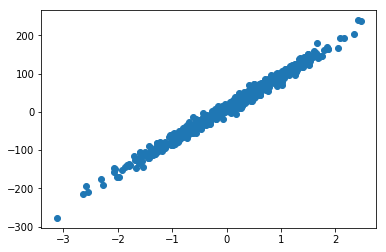

In [5]:
plt.scatter(X,Y)
Y.shape[0]

In [4]:
split = int( X.shape[0]*0.8)


In [5]:
split

400

In [6]:
X_train = X[:split]
X_test = X[split:]


In [7]:
Y_train = Y[:split]
Y_test = Y[split:]



In [8]:
print(X_train.shape , X_test.shape)
print(Y_train.shape, Y_test.shape)

(400, 1) (100, 1)
(400,) (100,)


In [9]:
## Methods we need to write
def hypothesis(X,theta):
    return theta[0] + X*theta[1]



In [10]:
def get_error(X,Y, theta):
    error = 0.0
    m = X.shape[0]
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        error += (h - Y[i])**2
        
    error = error/2*m
    
    return error

In [11]:
def get_grad(X,Y,theta):
    grad = np.zeros((2,))
    
    m = X.shape[0]
    for i in range(m):
        h = hypothesis(X[i],theta)
        grad[0] += (h - Y[i])
        grad[1] += (h - Y[i])*(X[i])
        
    grad[0] = grad[0]/m
    grad[1] = grad[1]/m
    
    return grad
        
      

In [12]:
def gradient_descent(X,Y,learning_rate = 0.01):
    error_list = []
    theta = np.zeros((2,))
    max_iter = 500
    
    for i in range(500):
        g = get_grad(X,Y,theta)
        e = get_error(X,Y,theta)
        error_list.append(e)
        
        theta[0] -= learning_rate*g[0]
        theta[1] -= learning_rate*g[1]

    return theta , error_list
        


In [13]:
theta_final, errors = gradient_descent(X_train,Y_train)

In [14]:
errors

[array([15810784.09551242]),
 array([15664363.86920161]),
 array([15520822.83056765]),
 array([15380104.20114815]),
 array([15242152.32534258]),
 array([15106912.64814472]),
 array([14974331.69331743]),
 array([14844357.04200199]),
 array([14716937.31175229]),
 array([14592022.13598601]),
 array([14469562.14384443]),
 array([14349508.94045253]),
 array([14231815.08757143]),
 array([14116434.08463547]),
 array([14003320.35016638]),
 array([13892429.20355646]),
 array([13783716.84721421]),
 array([13677140.34906458]),
 array([13572657.62539697]),
 array([13470227.42405418]),
 array([13369809.30795522]),
 array([13271363.63894574]),
 array([13174851.56196913]),
 array([13080234.98955212]),
 array([12987476.58659865]),
 array([12896539.75548585]),
 array([12807388.62145587]),
 array([12719988.01829809]),
 array([12634303.47431555]),
 array([12550301.19857017]),
 array([12467948.06740112]),
 array([12387211.61121088]),
 array([12308060.00151375]),
 array([12230462.03824152]),
 array([121543

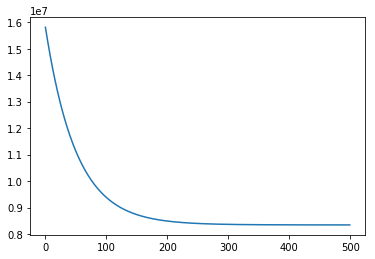

In [15]:
plt.plot(errors)